In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys as api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key
# Demo cities
cities2 = ['carnarvon',
 'camacha',
 'alofi',
 'vanavara',
 'victoria',
 'shchelyayur',
 'saleaula',
 'illoqqortoormiut',
 'tasiilaq',
 'cidreira',
 'busselton',
 'mataura',
 'bambous virieux',
 'tuktoyaktuk',
 'providencia',
 'umzimvubu']
lat = []
temp = []
hum = []
cloud = []
wind = []
# Starting URL for Weather Map API Call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}&q="
# cities or cities2
for city in cities:
    try:
        response = requests.get(url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
    except KeyError:
        pass

<IPython.core.display.Javascript object>


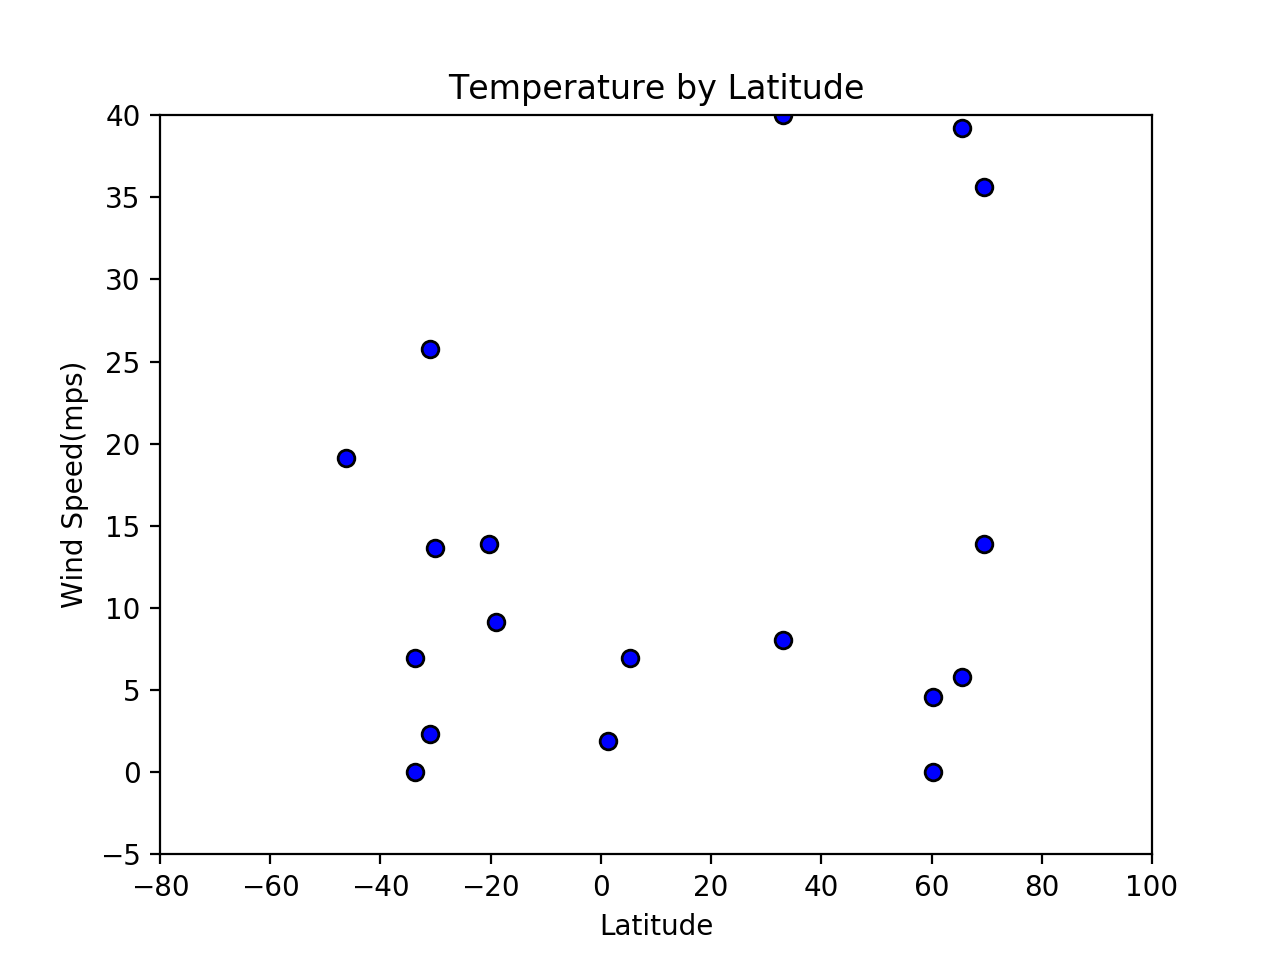

In [9]:
plt.scatter(lat, temp, marker="o", facecolors="blue", edgecolors="black")
plt.title("Max Temperature by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.ylim(-100,150)
plt.xlim(-80,100)
plt.show()

In [10]:
plt.scatter(lat, hum, marker="o", facecolors="blue", edgecolors="black")
plt.title("Temperature by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.show()

In [11]:
plt.scatter(lat, cloud, marker="o", facecolors="blue", edgecolors="black")
plt.title("Temperature by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.ylim(-20,120)
plt.xlim(-80,100)

(-80, 100)

In [12]:
plt.scatter(lat, wind, marker="o", facecolors="blue", edgecolors="black")
plt.title("Temperature by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mps)")
plt.ylim(-5,40)
plt.xlim(-80,100)

(-80, 100)